In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle
import warnings

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [4]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Analysis

C:\Users\nmsat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1500x700 with 0 Axes>

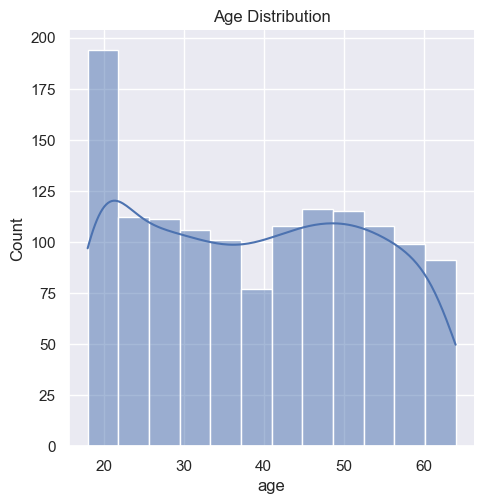

In [8]:
# distribution of age 
sns.set()
plt.figure(figsize=(15,7))
sns.displot(df['age'],kde=True)
plt.title('Age Distribution')
plt.show()

C:\Users\nmsat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1500x700 with 0 Axes>

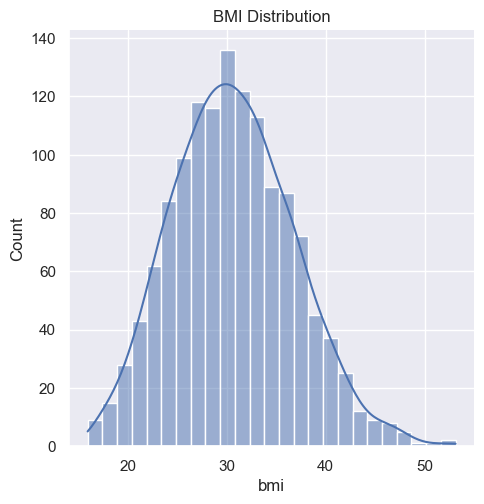

In [9]:
sns.set()
plt.figure(figsize=(15,7))
sns.displot(df['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

C:\Users\nmsat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1500x700 with 0 Axes>

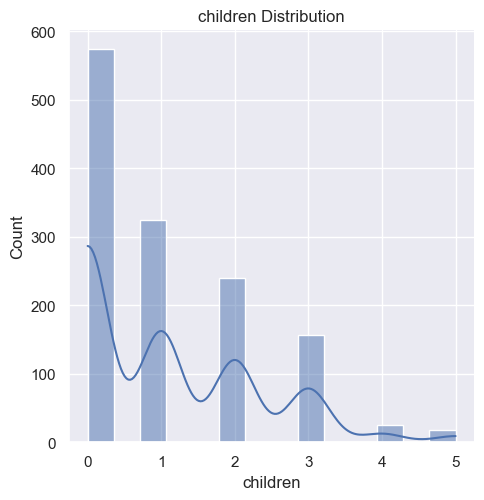

In [10]:
sns.set()
plt.figure(figsize=(15,7))
sns.displot(df['children'], kde=True)
plt.title('children Distribution')
plt.show()

C:\Users\nmsat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1500x700 with 0 Axes>

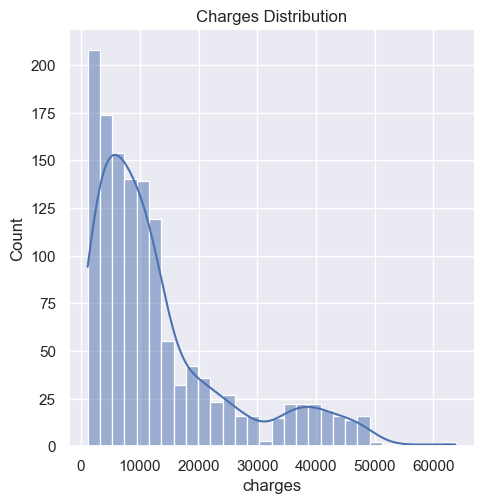

In [11]:
sns.set()
plt.figure(figsize=(15,7))
sns.displot(df['charges'], kde=True)
plt.title('Charges Distribution')
plt.show()

In [12]:
# gender wise charges
round(df.groupby('sex')['charges'].sum(),2)

sex
female    8321061.19
male      9434763.80
Name: charges, dtype: float64

In [13]:
#gender wise smoker count
smoke=df.groupby('sex')['smoker'].count()
smoke

sex
female    662
male      676
Name: smoker, dtype: int64

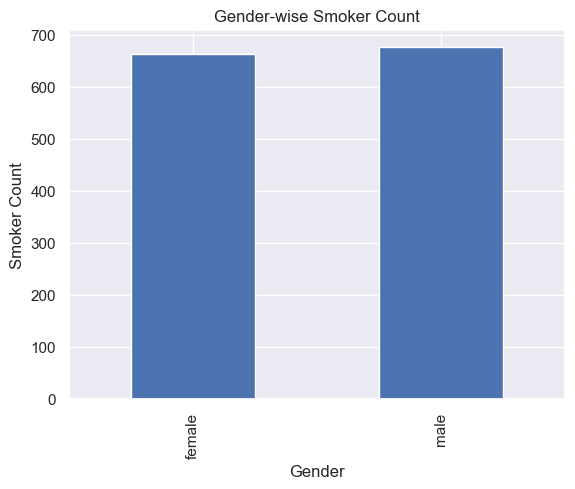

In [14]:
smoke.plot(kind='bar')
plt.title('Gender-wise Smoker Count')
plt.xlabel('Gender')
plt.ylabel('Smoker Count')
plt.show()

In [15]:
child=df['children'].value_counts()
child

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

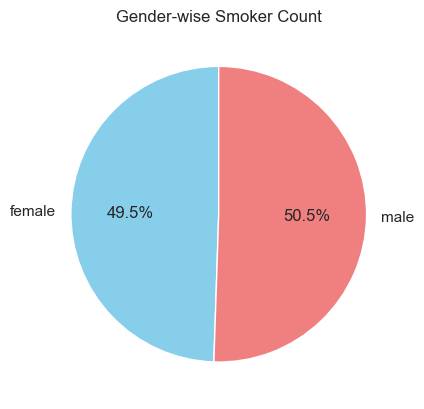

In [16]:
smoke.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender-wise Smoker Count')
plt.ylabel('')  
plt.show()

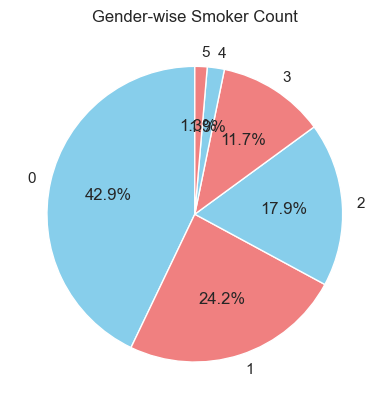

In [17]:
child.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender-wise Smoker Count')
plt.ylabel('')  # Hides the y-label for a cleaner look
plt.show()

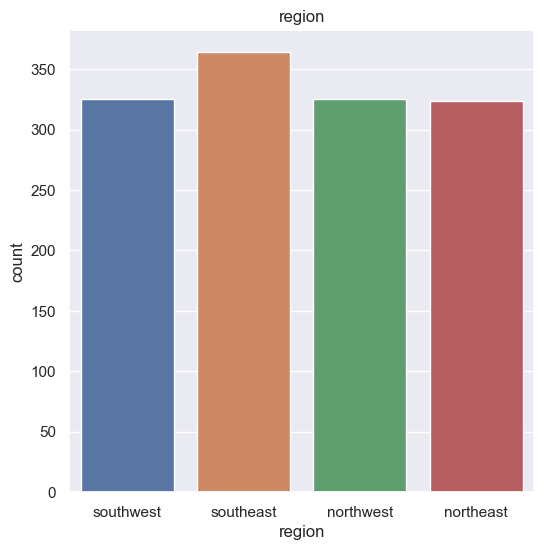

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

# Data Preprocessing

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
categorical_columns = df.select_dtypes('object')
categorical_columns

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [21]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [22]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] =df['sex'].map({'male': 1, 'female': 0})
df['region'] = df['region'].map({'southeast': 1, 'southwest': 2,'northeast':3,'northwest':4})

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520


In [24]:
x = df.drop('charges', axis=1)

In [25]:
y=df['charges']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

### Create an Evaluate Function to give all metrics after model Training

In [28]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [31]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5902.4058
- Mean Absolute Error: 4046.1716
- R2 Score: 0.7412
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6416.3459
- Mean Absolute Error: 4523.9158
- R2 Score: 0.7625


Lasso
Model performance for Training set
- Root Mean Squared Error: 5902.4069
- Mean Absolute Error: 4046.4676
- R2 Score: 0.7412
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6416.4923
- Mean Absolute Error: 4524.2995
- R2 Score: 0.7625


Ridge
Model performance for Training set
- Root Mean Squared Error: 5902.7452
- Mean Absolute Error: 4056.1826
- R2 Score: 0.7412
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6421.7215
- Mean Absolute Error: 4536.9182
- R2 Score: 0.7621


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 9288.7720
- Mean Absolute Error: 6354.6143


In [35]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.854427
6,AdaBoost Regressor,0.840857
0,Linear Regression,0.762475
1,Lasso,0.762464
2,Ridge,0.762077
4,Decision Tree,0.721038
3,K-Neighbors Regressor,0.132994


# Modelling

In [33]:
re=RandomForestRegressor()

In [39]:
rf= RandomForestRegressor()
rf =rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 85.23


# Plot y_pred and y_test


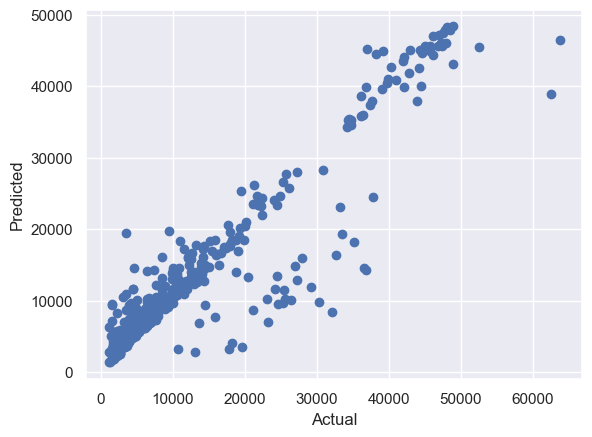

In [42]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

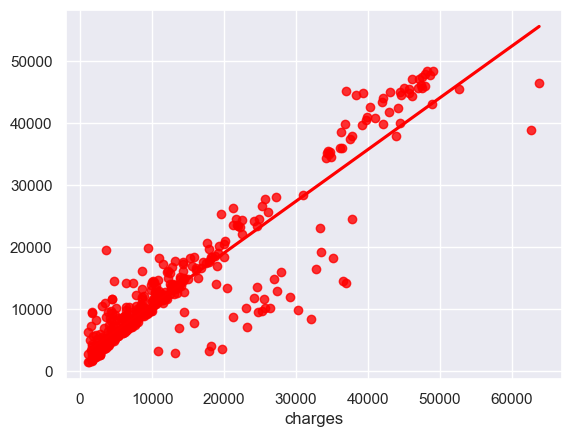

In [43]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

### Difference between Actual and Predicted Values


In [46]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
43,6313.7590,9016.102765,-2702.343765
53,37742.5757,37933.549418,-190.973718
945,11674.1300,11916.720042,-242.590042
555,3847.6740,6453.120123,-2605.446123
874,8891.1395,8901.447535,-10.308035
...,...,...,...
852,42111.6647,44118.090149,-2006.425449
271,42856.8380,41893.316206,963.521794
563,9058.7303,9203.666005,-144.935705
1068,14349.8544,17590.965427,-3241.111027


In [55]:
# Load the model from the file
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)